In [1]:
import sys
import os
import pandas as pd

In [2]:
BASE_PATH = "/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying"
sys.path.append(BASE_PATH)
os.chdir(BASE_PATH)

# Imports

In [3]:
from scripts.config import TRAIN_SET_PATH, TEXT_COLUMN, LABEL_COLUMN, BINARY_LABEL_COLUMN
from scripts.data_loader import DataLoader
from scripts.data_understanding import DataUnderstanding
from scripts.data_cleaning import DataCleaner
from scripts.data_balancing import DataBalancer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Training data loading

In [ ]:
loader = DataLoader(file_path=TRAIN_SET_PATH)
train_df = loader.load_dataset()

Dataset loaded with shape: (29607, 6)


# Training data understanding

In [6]:
du = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_soft',          
    class_column=LABEL_COLUMN        
)

In [7]:
du.class_distribution()


Class Distribution:
cyberbullying_type
age                    5644
religion               5602
ethnicity              5400
gender                 5320
other_cyberbullying    3881
not_cyberbullying      3760
Name: count, dtype: int64


In [8]:
du.check_imbalance()


Class Imbalance Ratio (max/min): 1.50


In [9]:
du.check_missing_values()


Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             20
tweet_full              1
is_cyberbullying        0
cyberbullying_label     0
dtype: int64


In [10]:
du.check_empty_strings()


Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
dtype: int64


/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


In [11]:
du.check_duplicates()


Number of duplicated tweet_soft: 178


In [12]:
du.inspect_duplicates(text_column='tweet_soft', label_column=LABEL_COLUMN)



Total duplicated texts (same text, any label): 255 rows

Label counts among all duplicates:
gender: 130
not_cyberbullying: 37
other_cyberbullying: 30
age: 22
ethnicity: 20
religion: 16

Perfect duplicates (same text and same label): 247 rows
Imperfect duplicates (same text, different labels): 6 rows


In [13]:
du.average_tweet_length()


Average Tweet Length: 135.89 characters
Average Tweet Length: 24.97 words


In [15]:
du.binary_class_distribution()


Binary Class Distribution:
is_cyberbullying
Yes    0.873003
No     0.126997
Name: proportion, dtype: float64


# Data preprocessing

In [19]:
train_cleaner = DataCleaner(train_df, text_column='tweet_soft', label_column='cyberbullying_type')


In [20]:
# --- Before cleaning: duplicates analysis ---
print("----- BEFORE REMOVING -----")
print(f"Total row numbers: {train_df.shape[0]}")
print(f"Only text duplicates (tweet_soft): {train_df.duplicated(subset=['tweet_soft']).sum()}")
print(f"Text + label duplicates (tweet_soft + cyberbullying_type): {train_df.duplicated(subset=['tweet_soft', 'cyberbullying_type']).sum()}")

----- BEFORE REMOVING -----
Total row numbers: 29607
Only text duplicates (tweet_soft): 178
Text + label duplicates (tweet_soft + cyberbullying_type): 172


In [21]:
# --- Duplicates cleaning ---
train_cleaned_df = train_cleaner.clean_all_duplicates()


--- CLEANING DUPLICATES BASED ON TEXT COLUMN: tweet_soft ---

[1/3] Removing perfect duplicates...
Removed 172 perfect duplicates.

[2/3] Removing conflicting label duplicates...
Removed 8 conflicting label rows.

[3/3] Forcing final text-only duplicate removal...
Removed 2 pure text duplicates.

DUPLICATE CLEANING COMPLETED.


In [22]:
# --- Duplicates cleaning results  ---
print("\n----- AFTER REMOVING -----")
print(f"Total row numbers: {train_cleaned_df.shape[0]}")
print(f"Only text duplicates control (tweet_soft): {train_cleaned_df.duplicated(subset=['tweet_soft']).sum()}")
print(f"Text + label duplicates control (tweet_soft + cyberbullying_type): {train_cleaned_df.duplicated(subset=['tweet_soft', 'cyberbullying_type']).sum()}")


----- AFTER REMOVING -----
Total row numbers: 29425
Only text duplicates control (tweet_soft): 0
Text + label duplicates control (tweet_soft + cyberbullying_type): 0


In [23]:
# --- Missing values cleaning ---
important_columns = ['tweet_soft', 'tweet_full']
train_cleaned_df = train_cleaner.drop_missing_values(important_columns)


--- DROPPING MISSING VALUES IN IMPORTANT COLUMNS: ['tweet_soft', 'tweet_full'] ---
Removed 2 rows with missing values.

MISSING VALUES CLEANING COMPLETED.


In [24]:
# --- Missing values cleaning results ---
print("\n----- AFTER REMOVING MISSING VALUES -----")
print(f"Total row numbers: {train_cleaned_df.shape[0]}")
print(f"Missing values remaining:\n{train_cleaned_df.isnull().sum()}")


----- AFTER REMOVING MISSING VALUES -----
Total row numbers: 29423
Missing values remaining:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64


# Preprocessed training data understanding

In [25]:
cleaned_du = DataUnderstanding(
    dataset=train_cleaned_df,
    text_column='tweet_soft',          
    class_column=LABEL_COLUMN        
)

In [26]:
cleaned_du.class_distribution()


Class Distribution:
cyberbullying_type
age                    5629
religion               5592
ethnicity              5387
gender                 5226
other_cyberbullying    3858
not_cyberbullying      3731
Name: count, dtype: int64


In [27]:
cleaned_du.check_imbalance()


Class Imbalance Ratio (max/min): 1.51


In [28]:
cleaned_du.check_missing_values()


Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64


In [29]:
cleaned_du.check_empty_strings()


Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64


/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


In [30]:
cleaned_du.check_duplicates()


Number of duplicated tweet_soft: 0


In [31]:
cleaned_du.inspect_duplicates(text_column='tweet_soft', label_column='cyberbullying_type')


Total duplicated texts (same text, any label): 0 rows

Label counts among all duplicates:

Perfect duplicates (same text and same label): 0 rows
Imperfect duplicates (same text, different labels): 0 rows


# Data balancing

In [ ]:
train_cleaned_df['tweet_soft'] = train_cleaned_df['tweet_soft'].astype(str)


In [33]:
balancer = DataBalancer(target_size=15000)
df_balanced = balancer.balance(train_cleaned_df, text_column='tweet_soft', label_column='is_cyberbullying', minority_label=0)


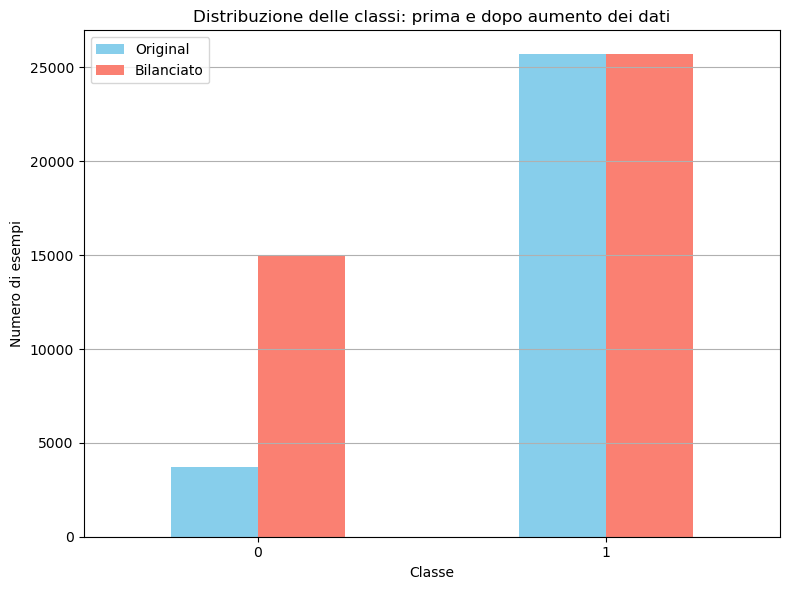

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the class distribution before and after balancing
original_counts = train_cleaned_df['is_cyberbullying'].value_counts().sort_index()
balanced_counts = df_balanced['is_cyberbullying'].value_counts().sort_index()

# Create a combined DataFrame for comparison
df_compare = pd.DataFrame({
    'Original': original_counts,
    'Bilanciato': balanced_counts
})

# Plot the bar chart
ax = df_compare.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Distribuzione delle classi: prima e dopo aumento dei dati')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
